In [3]:
! ls

Books      NYU-2018   self-study


In [34]:
import pandas as pd
import numpy as np

df_smoking_2017=pd.read_excel('NYU-2018/CityChallengeWeek/smoking-status.xls', sheet_name='df')
df_smoking_2017.head()

,Code,Area name,current cigarette smoker,ex-smoker,never smoked,Total,Rate,currentSmoker,exSmoker
0,E09000002,Barking and Dagenham,26000,28000,86000,140000,19,0.185714,0.200000
1,E09000003,Barnet,49000,50000,187000,286000,17,0.171329,0.174825
2,E09000004,Bexley,22000,48000,117000,187000,12,0.117647,0.256684
3,E09000005,Brent,36000,35000,160000,231000,16,0.155844,0.151515
4,E09000006,Bromley,34000,62000,152000,248000,14,0.137097,0.250000


In [77]:
print(np.arange(1, 11, 1))
print(np.arange(10, 0, -1))

[ 1  2  3  4  5  6  7  8  9 10]
[10  9  8  7  6  5  4  3  2  1]


In [78]:
df_smoking=df_smoking_2017[['Code', 'Area name', 'currentSmoker', 'exSmoker']]
df_smoking.columns=['code', 'borough', 'currentSmoker', 'exSmoker']

df_smoking['currentSmokerP10']=pd.qcut(df_smoking['currentSmoker'], 10, labels=np.arange(1, 11, 1))
df_smoking['exSmokerP10']=pd.qcut(df_smoking['exSmoker'], 10, labels=np.arange(1, 11, 1))

df_smoking['currentSmokerP100']=pd.qcut(df_smoking['currentSmoker'], 100, labels=np.arange(1, 101, 1))
df_smoking['exSmokerP100']=pd.qcut(df_smoking['exSmoker'], 100, labels=np.arange(1, 101, 1))

df_smoking.head()

/Users/tanyanabila/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/tanyanabila/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tanyanabila/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,code,borough,currentSmoker,exSmoker,currentSmokerP10,exSmokerP10,currentSmokerP100,exSmokerP100
0,E09000002,Barking and Dagenham,0.185714,0.200000,10,3,91,30
1,E09000003,Barnet,0.171329,0.174825,9,2,89,14
2,E09000004,Bexley,0.117647,0.256684,2,8,12,73
3,E09000005,Brent,0.155844,0.151515,7,1,62,7
4,E09000006,Bromley,0.137097,0.250000,4,7,37,69


In [79]:
%matplotlib inline
import geopandas as gpd
# fp = 'statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
fp = 'NYU-2018/CityChallengeWeek/statistical-gis-boundaries-london/ESRI/London_Ward_CityMerged.shp'
# fp = 'statistical-gis-boundaries-london/ESRI/London_Ward.shp'
map_df = gpd.read_file(fp)
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.6 165447.1, 517837.1 165469.4..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.5 167303.4, 518114.3 167307.5..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480 166909.8, 520490.7 166901.9, ..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071 168144.9, 522063.9 168144, 52..."


In [80]:
merged = map_df.set_index('LB_GSS_CD').join(df_smoking.set_index('code'), how='left')
merged.head()

merged=merged.dropna()

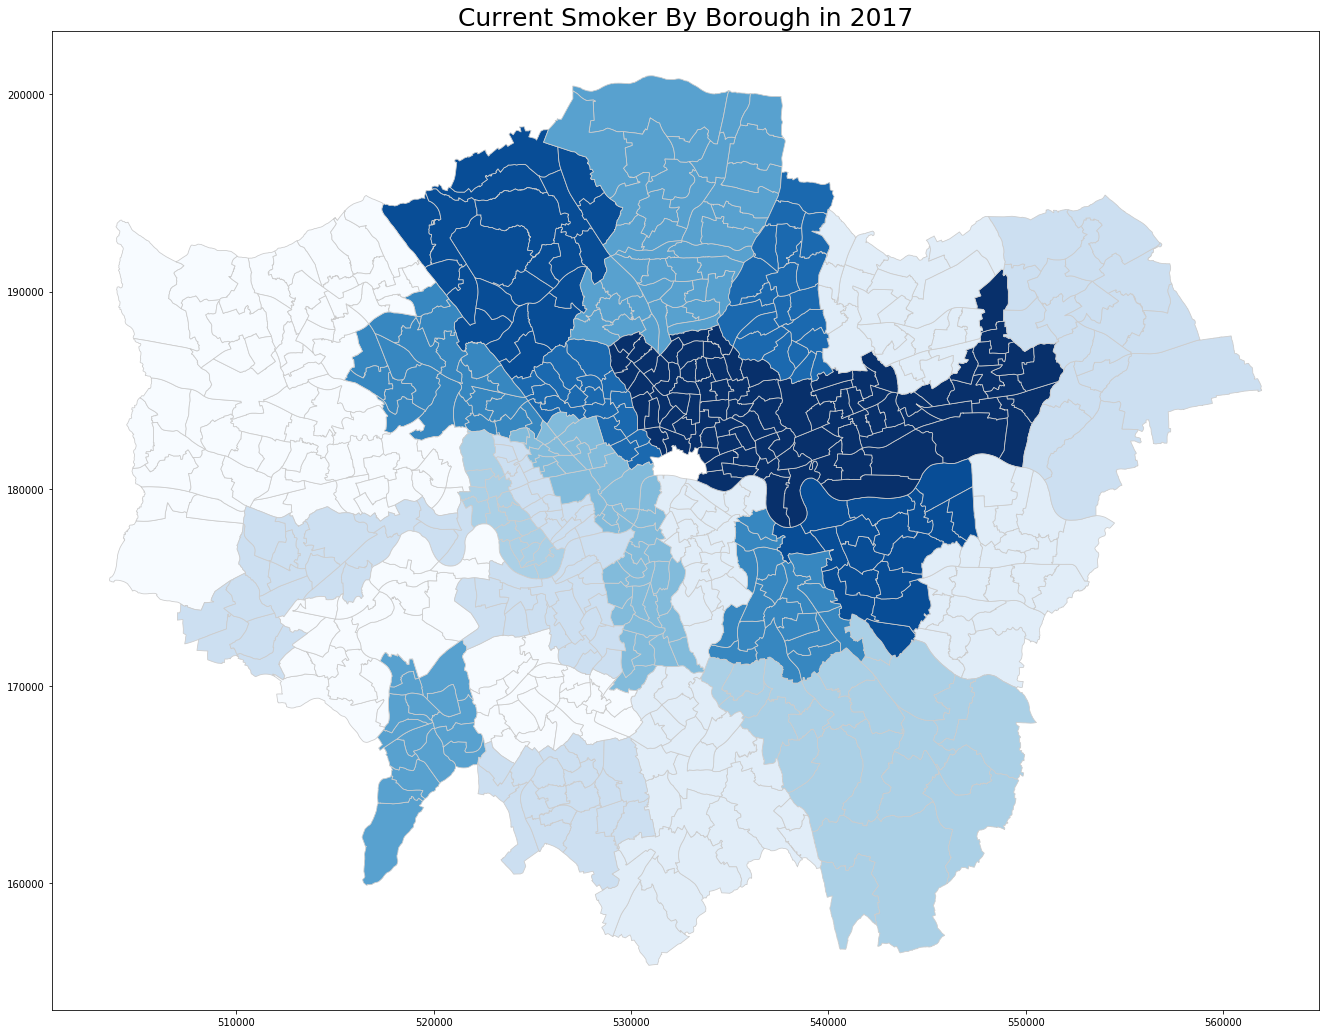

In [83]:
import matplotlib.pyplot as plt

variable = 'currentSmokerP10'
title='Current Smoker By Borough in 2017'
source='Source: https://data.london.gov.uk/dataset/smoking-indicators-borough'

# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 18))

# add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
# ax.annotate(source,xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')



In [91]:
merged.sort_values('currentSmoker')

,NAME,GSS_CODE,HECTARES,NONLD_AREA,BOROUGH,POLY_ID,geometry,borough,currentSmoker,exSmoker,currentSmokerP10,exSmokerP10,currentSmokerP100,exSmokerP100
E09000015,Hatch End,E05000291,327.866,0.000,Harrow,51014,"POLYGON ((512630.8 190259.9, 512629.3 190261.9...",Harrow,0.092784,0.170103,1,2,1,12
E09000015,Greenhill,E05000288,174.490,0.000,Harrow,51077,"POLYGON ((516053.6 187923.1, 515956.6 187921.3...",Harrow,0.092784,0.170103,1,2,1,12
E09000015,Headstone North,E05000292,329.634,0.000,Harrow,51027,"POLYGON ((512813.9 188470.6, 512812.9 188473, ...",Harrow,0.092784,0.170103,1,2,1,12
E09000015,Edgware,E05000287,140.319,0.000,Harrow,116975,"POLYGON ((518386.9 191188.1, 518480 191197.2, ...",Harrow,0.092784,0.170103,1,2,1,12
E09000015,Queensbury,E05000299,161.364,0.000,Harrow,116974,"POLYGON ((518519.5 189686.4, 518516.4 189682.2...",Harrow,0.092784,0.170103,1,2,1,12
E09000015,Kenton East,E05000294,127.926,0.000,Harrow,50511,"POLYGON ((517098.8 189585.8, 517150.4 189605.5...",Harrow,0.092784,0.170103,1,2,1,12
E09000015,Belmont,E05000285,177.704,0.000,Harrow,116973,"POLYGON ((515913.7 190789.8, 515892.4 190825.7...",Harrow,0.092784,0.170103,1,2,1,12
E09000015,Pinner South,E05000298,234.561,0.000,Harrow,51020,"POLYGON ((512813.9 188470.6, 512774 188459.1, ...",Harrow,0.092784,0.170103,1,2,1,12
E09000015,Wealdstone,E05000304,119.595,0.000,Harrow,51079,"POLYGON ((515913.7 190789.8, 515927.7 190770.1...",Harrow,0.092784,0.170103,1,2,1,12
E09000015,Headstone South,E05000293,146.764,0.000,Harrow,51080,"POLYGON ((514986.1 188073.4, 514846.3 188080.4...",Harrow,0.092784,0.170103,1,2,1,12


In [90]:
map_df[map_df.GSS_CODE=='E05000039']

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
608,Thames,E05000039,788.848,120.125,E09000002,Barking and Dagenham,117012,"POLYGON ((544418 183020.3, 544423.1 183022.9, ..."


In [88]:
merged[['']].to_csv('df_smoking.csv')